In [23]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('insurance_data_nb.csv')
print(df)

    Age  Income  Buy
0    22   25000   No
1    25   32000   No
2    47   50000  Yes
3    52   60000  Yes
4    46   55000  Yes
5    56   65000  Yes
6    48   52000  Yes
7    30   40000   No
8    28   35000   No
9    35   45000   No
10   40   50000  Yes
11   50   60000  Yes
12   60   70000  Yes
13   27   30000   No
14   33   42000   No
15   55   62000  Yes


In [5]:
# Convert target to binary
df['Buy'] = df['Buy'].map({'No': 0, 'Yes': 1})

In [7]:
# Features and target
X = df[['Age', 'Income']]
y = df['Buy']

In [9]:
# Scale features (optional for GaussianNB, but helps sometimes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [31]:
# Create & train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [33]:
# Make predictions
y_pred = model.predict(X_test)

In [35]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[3 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [37]:
# Predict for new person
new_person = scaler.transform([[45, 55000]])
prediction = model.predict(new_person)
print(f"Will a 45-year-old with ₹55,000 income buy insurance? {'Yes' if prediction[0]==1 else 'No'}")


Will a 45-year-old with ₹55,000 income buy insurance? Yes


C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


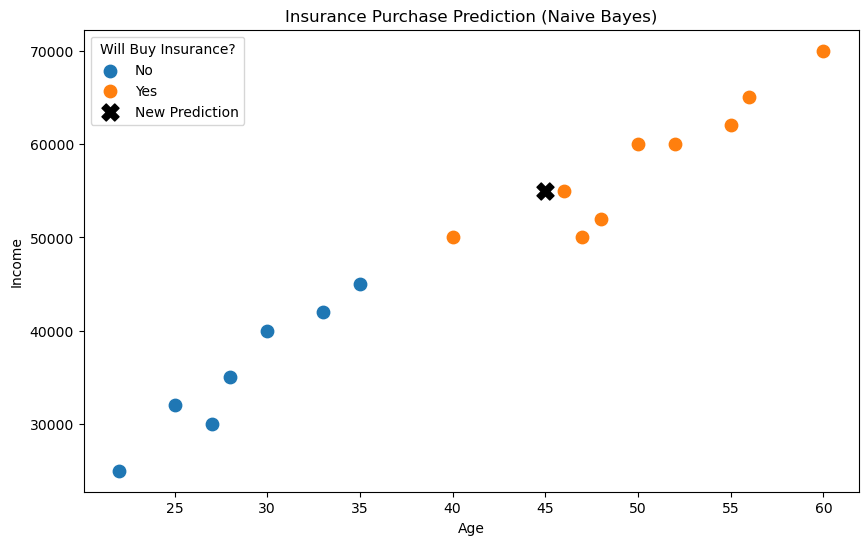

In [39]:
# Unscale the dataset for plotting axes in original units
X_unscaled = scaler.inverse_transform(X_scaled)

# Plot data points colored by 'Buy'
plt.figure(figsize=(10, 6))

for label in [0, 1]:
    plt.scatter(
        X_unscaled[y == label][:, 0],  # Age
        X_unscaled[y == label][:, 1],  # Income
        label=f"{'No' if label == 0 else 'Yes'}",
        s=80
    )

# Plot the new prediction point
new_point = scaler.inverse_transform(new_person)
plt.scatter(new_point[:, 0], new_point[:, 1],
            c='black', s=150, marker='X', label='New Prediction')

plt.title('Insurance Purchase Prediction (Naive Bayes)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Will Buy Insurance?')
plt.show()